# Inserting variables into pages with `glue`

You often wish to run analyses in one notebook and insert them into your
documents text elsewhere. For example, if you'd like to include a figure,
or if you want to cite a statistic that you have run.

In this case, it is important to know you have the latest version of whatever
you wish to insert. Using `MyST-NB` you can keep track of the values of particular
variables **at run time**. To do so, use the `glue` function.

First, we'll generate some random data, and simulate a confidence interval:

In [3]:
from myst_nb import glue
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_samples = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

## Gluing variables in your notebook

Once a variable is defined, you can use `myst_nb.glue()` to assign the value of the variable to
a key of your choice. `glue` will store all of the information that is normally used to **display**
a variable (ie, whatever happens when you display the variable by putting it at the end of a cell).
Choose a key that you will remember, as you will use it later.

In [4]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_samples].mean(0)
# Calcualte the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

3.001754997383061

2.989209213245072

3.0140129957401514

By default, `glue` will also display the value of the variable you are gluing. This
is useful for sanity-checking its value at glue-time. If you'd like to **prevent display**,
use the `display=False` option. Note that below, we also *overwrite* the value of
`boot_clo` (but using the same value):

In [5]:
glue("boot_chi", chi, display=False)

You can also glue visualizations, such as matplotlib figures (here we use `display=False` to ensure that the figure isn't plotted twice):

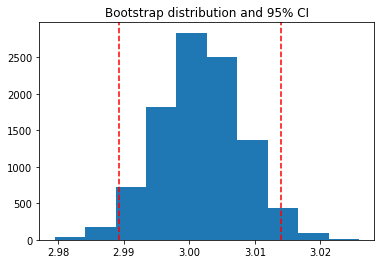

In [7]:
# Visualize the historgram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")
glue("boot_fig", fig, display=False)

## Pasting glued variables into your page

If you have a notebook that contains glued variables, you can then **paste**
those variables into your text anywhere you like. There are two ways to paste
items into your page, the *`paste`* directive and role.

### Using the `paste` directive

You can call the paste directive like so:

````
```{paste} your-key
```
````

For example, we'll paste the plot we generated above with the following text:

````
```{paste} boot_fig
```
````

Here's how it looks:

```{paste} boot_fig
```

### Using the `paste` role

It's also possible to paste variables **in-line with your text**. This is done with
the `paste` role. You can call it like so: `` {paste}`your-key` ``.
For example, the following text:

```
The mean of the bootstrapped distribution was {paste}`boot_mean` (95% confidence interval {paste}`boot_clo`/{paste}`boot_chi`).
```

Is rendered as: 
The mean of the bootstrapped distribution was {paste}`boot_mean` (95% confidence interval {paste}`boot_clo`/{paste}`boot_chi`)


#### Formatting with the `paste` role

You can also add formatting to the output with the paste role.
This is particularly useful if you are displaying numbers and
want to round the results. To add formatting, use this pattern:

* `` {paste}`mykey:formatstring` ``

For example, the following: ``My rounded mean: {paste}`boot_mean:.2f` `` will be rendered like this: My rounded mean: {paste}`boot_mean:.2f` (95% CI: {paste}`boot_clo:.2f`/{paste}`boot_chi:.2f`).
